Recommendation System Project

**Problem Statement** -
Build your own recommendation system for products on an e-commerce website like Amazon.com.

**Dataset Link** -
https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)
columns = ['userId', 'productId', 'ratings', 'timestamp']
ratings_df = pd.read_csv('ratings_Electronics.csv',names= columns)

In [5]:
ratings_df.head(5)

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [11]:
ratings_df.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

In [7]:
ratings_df.info()

## Totally- 7824482 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [9]:
range =ratings_df['ratings'].unique()
range

array([5., 1., 3., 2., 4.])

In [12]:
ratings_df['ratings'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

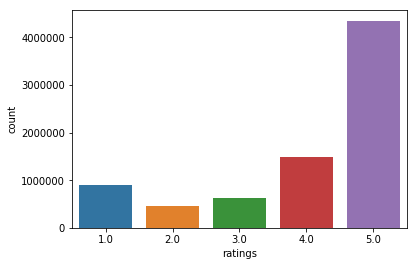

In [10]:
sns.countplot(ratings_df['ratings'])

# 55% of ratings are have a 5 Rating.
# Let us make the data set less sparse/or spread right

In [14]:
# keep the users only who has given 50 or more number of ratings
# a = ratingsdf.groupby('userId')['ratings'].size()
# a[ a > 50][0]

ratings_50 = ratings_df.groupby('userId').size().loc[lambda x: x>=50].sort_values()


userId
A2RS66Y79Q8X0W    50
A2Y4H3PXB07WQI    50
A3VZH0PWLQ9BB1    50
A19N3S7CBSU6O7    50
A1IU4UAV9QIJAI    50
dtype: int64

In [16]:
ratings_50.head()

userId
A2RS66Y79Q8X0W    50
A2Y4H3PXB07WQI    50
A3VZH0PWLQ9BB1    50
A19N3S7CBSU6O7    50
A1IU4UAV9QIJAI    50
dtype: int64

In [18]:
ratings_df = ratings_df[ratings_df['userId'].isin(ratings_50.keys())]

In [19]:
## the data is now reduced to 125871.
#Only  users who have given atleast 50 reviews are selected

ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 4 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
timestamp    125871 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


In [20]:
ratings_df['ratings'].value_counts()

5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: ratings, dtype: int64

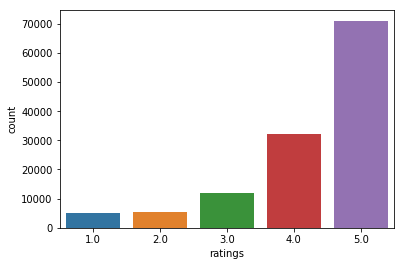

In [21]:
sns.countplot(ratings_df['ratings'])

In [22]:
mean_rating = pd.DataFrame(ratings_df.groupby('productId')['ratings'].mean()) 
mean_rating.head()

,ratings
productId,
0594451647,5.000000
0594481813,3.000000
0970407998,2.500000
0972683275,4.750000
1400501466,3.333333


In [23]:
mean_rating['counts'] = pd.DataFrame(ratings_df.groupby('productId')['ratings'].count())

In [25]:
mean_rating.head()

,ratings,counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [35]:
def weighted_rating(mean_rating, min_rate, mean_rating_df):
    weighted_rating = list()
    K= mean_rating.counts.values
    N = mean_rating.ratings.values
    for k, n in zip(K, N):
        if k < 5:
            weighted_rating.append(0)
        else:
            weighted_rating.append((k/(k+min_rate))*n + (min_rate/(k+min_rate))*mean_rating_df)
    return(weighted_rating)

In [36]:
mean_rating['R'] = weighted_rating(mean_rating, 5, np.mean(mean_rating.ratings.values))

In [37]:
mean_rating.head()

,ratings,counts,wr,R
productId,,,,
0594451647,5.000000,1,0.000000,0.000000
0594481813,3.000000,1,0.000000,0.000000
0970407998,2.500000,2,0.000000,0.000000
0972683275,4.750000,4,0.000000,0.000000
1400501466,3.333333,6,3.734045,3.734045


# Build Popularity Recommender model.

In [41]:
# Products to be recommeded based on Popularity based model
mean_rating.wr.sort_values(ascending = False).head(10)



productId
B0052SCU8U    4.908787
B003ES5ZUU    4.846955
B001TH7T2U    4.846100
B00BQ4F9ZA    4.841490
B000FQ2JLW    4.836437
B001TH7GUU    4.832223
B003ES5ZR8    4.830700
B0046TJG1U    4.830155
B00ISFNSBW    4.829326
B0019EHU8G    4.821837
Name: wr, dtype: float64

In [42]:
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import Dataset
from surprise import Reader

In [43]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 4 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
timestamp    125871 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.8+ MB


In [45]:
df1 = pd.DataFrame(data={'userId':ratings_df.userId,
                            'productId':ratings_df.productId,                           
                           'ratings':ratings_df.ratings})
df1.head()

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


# Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [46]:
reader = Reader(rating_scale=(1, 5))
X_train, X_test = train_test_split(Dataset.load_from_df(df1, reader), test_size=.30)

# Build and Evaluate the above model

In [47]:
#  KNN with Means which takes in account the mean ratings of each user.
from surprise import KNNWithMeans

In [48]:
model = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(X_train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [49]:
# run model against test data
predictions = model.test(X_test)

# get RMSE 
print("User-based Model")
accuracy.rmse(predictions, verbose=True)
accuracy.mae(predictions, verbose=True)

User-based Model
RMSE: 1.0613
MAE:  0.7793


0.7792988753528227

In [53]:
model = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
model.fit(X_train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [54]:
predictions = model.test(X_test)

print("Item-based Model")
accuracy.rmse(predictions, verbose=True)
accuracy.mae(predictions, verbose=True)

Item-based Model
RMSE: 1.1406
MAE:  0.8084


0.8083895970669409

In [55]:
from surprise import SVD
from surprise import accuracy

In [57]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(X_train)

In [66]:
X_test[10]

('A1J5HIF41ENSMZ', 'B0032W20YW', 4.0)

In [60]:
test_pred = svd_model.test(X_test)

In [61]:
accuracy.rmse(test_pred)

RMSE: 2.0823


2.0822597185682894

# Get top - K ( K = 5) recommendations



In [79]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 'AT09WGFUM934H'][['iid', 'r_ui']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui
708,B002SAA42Y,5.0
12374,B006H06TVG,5.0
35688,B003TUMDWG,5.0
34738,B002OJN250,5.0
33769,B008A36R2Y,5.0


In [50]:
## Following code taken from http://nbviewer.jupyter.org/github/NicolasHug/Surprise/blob/master/examples/notebooks/KNNBasic_analysis.ipynb


def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(X_train.ur[X_train.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(X_train.ir[X_train.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [51]:
# courtesy the notebook
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
17789,A1VTCSCH8FFC76,B0035J7XG2,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",82,4,0.0
1318,A3UXW18DP4WSD6,B003ES5ZUU,5.0,5.0,"{'actual_k': 6, 'was_impossible': False}",37,134,0.0
1317,A1KKE6VX8VPWZK,B002MCZJ78,5.0,5.0,"{'actual_k': 8, 'was_impossible': False}",75,25,0.0
3095,A18U49406IPPIJ,B00GTLN1BO,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}",73,7,0.0
13278,ACY9QYNDFLVBI,B0014Z29OU,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",53,3,0.0
5191,AOWF9T81XMX2S,B00BQ4F9ZA,5.0,5.0,"{'actual_k': 3, 'was_impossible': False}",51,34,0.0
22473,A3GVXKCTFN3YDN,B00834SJSK,5.0,5.0,"{'actual_k': 7, 'was_impossible': False}",61,65,0.0
25468,A1EVV74UQYVKRY,B00BD7L16G,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",142,2,0.0
24673,A10H24TDLK2VDP,B00BOHNYU6,5.0,5.0,"{'actual_k': 3, 'was_impossible': False}",39,40,0.0
25948,A1143YEAZYMYHJ,B004CLYEE6,5.0,5.0,"{'actual_k': 3, 'was_impossible': False}",62,44,0.0


In [52]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
25137,A1D9V11QUHXENQ,B004LSNF04,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",44,16,4.0
25433,AETQIN7OH0RL9,B00AVBDGHM,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",28,4,4.0
5706,A259MPG6SOL02P,B001OORMVQ,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",79,11,4.0
6616,A316XO4RWX21YN,B005IHAIJ8,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",60,8,4.0
3498,AATWFX0ZZSE6C,B002HGFKR8,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",42,11,4.0
3464,A250AXLRBVYKB4,B000I1X6PM,5.0,1.0,"{'actual_k': 2, 'was_impossible': False}",149,4,4.0
8342,A4WEZJOIZIV4U,B005EWB3YG,1.0,5.0,"{'actual_k': 2, 'was_impossible': False}",167,5,4.0
11095,APGQTZZ4ZFPHO,B000LRMS66,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",44,53,4.0
33604,A2NN1KIYEM2SKS,B004CGHDEO,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",37,3,4.0
36647,A2NOW4U7W3F7RI,B004O0TREC,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",190,2,4.0
